In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import BLM as blm 
import sys
import beamlinegraphics as blg
import lhcTools as lt


from hisix import *
import plottingtools as pt
import lhcTools as lt

## hiSixTrack loss map

In [3]:
fort3 = '../../fort.3'
twiss = '../../preprocessing/optics/twiss_b1.tfs'
path  = '../../B1H.NEWOPT.LEFT.RUN/'

#### READ THE LOSSES FROM THE SIMULATION

losses = losses(fort3,twiss)

print '--> FLUKA collimator IDs have been assigned'

### READ THE SUMMARY FILES

losses.getSummary(path)
losses.finalize()

print '--> Summary files read and finalized'



--> Assigned ID from FLUKA input to 41 collimators
--> FLUKA collimator IDs have been assigned
--> Summary files read and finalized


## Measured loss map (left jaw only)

In [9]:
# load the BLM data
qldir    = '/media/phermes/1E10-926A/exp_data/'
filename = qldir+'20161125/BLMLHC_2016-11-25_#1.txt.gz'
time     = '25/11/2016 23:53:43'
b = blm.BLM()
b.read(filename,time)

summary files not found
Loading file
Allocating BLMs
Assigning timestamp
Get Signal
Timestamp found
Averaging over 10 seconds
Substract background
Saving BLM data


In [3]:
pth = '/home/phermes/Dropbox/codes/madx/160218_beamlinegraphics/twiss_b1.data.thick'

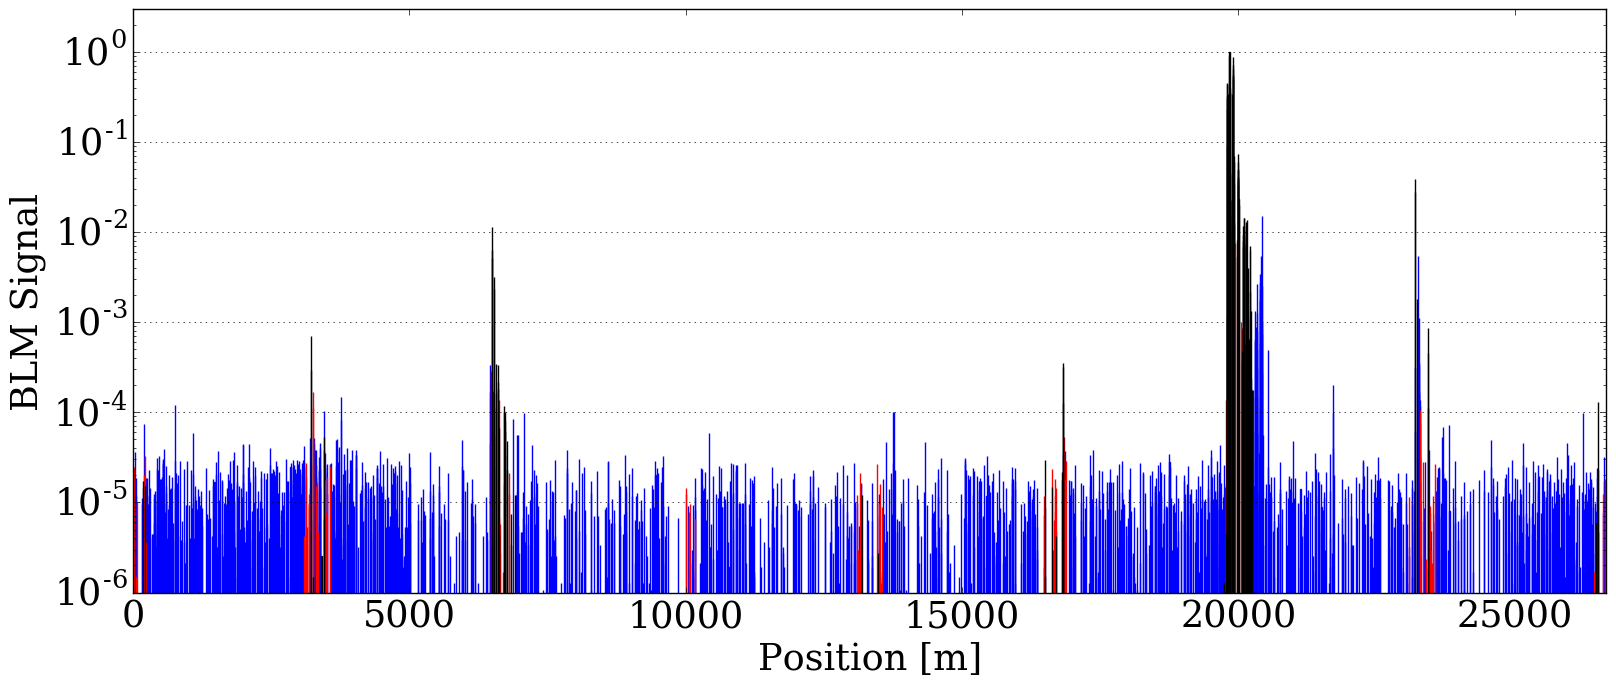

In [11]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 0.8                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax)               # create blgFigure object
bg.fig.delaxes(bg.blg)

b.lossmap(bg.ax1)


bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_ylabel('BLM Signal')

plt.show()

In [12]:
## Comparison

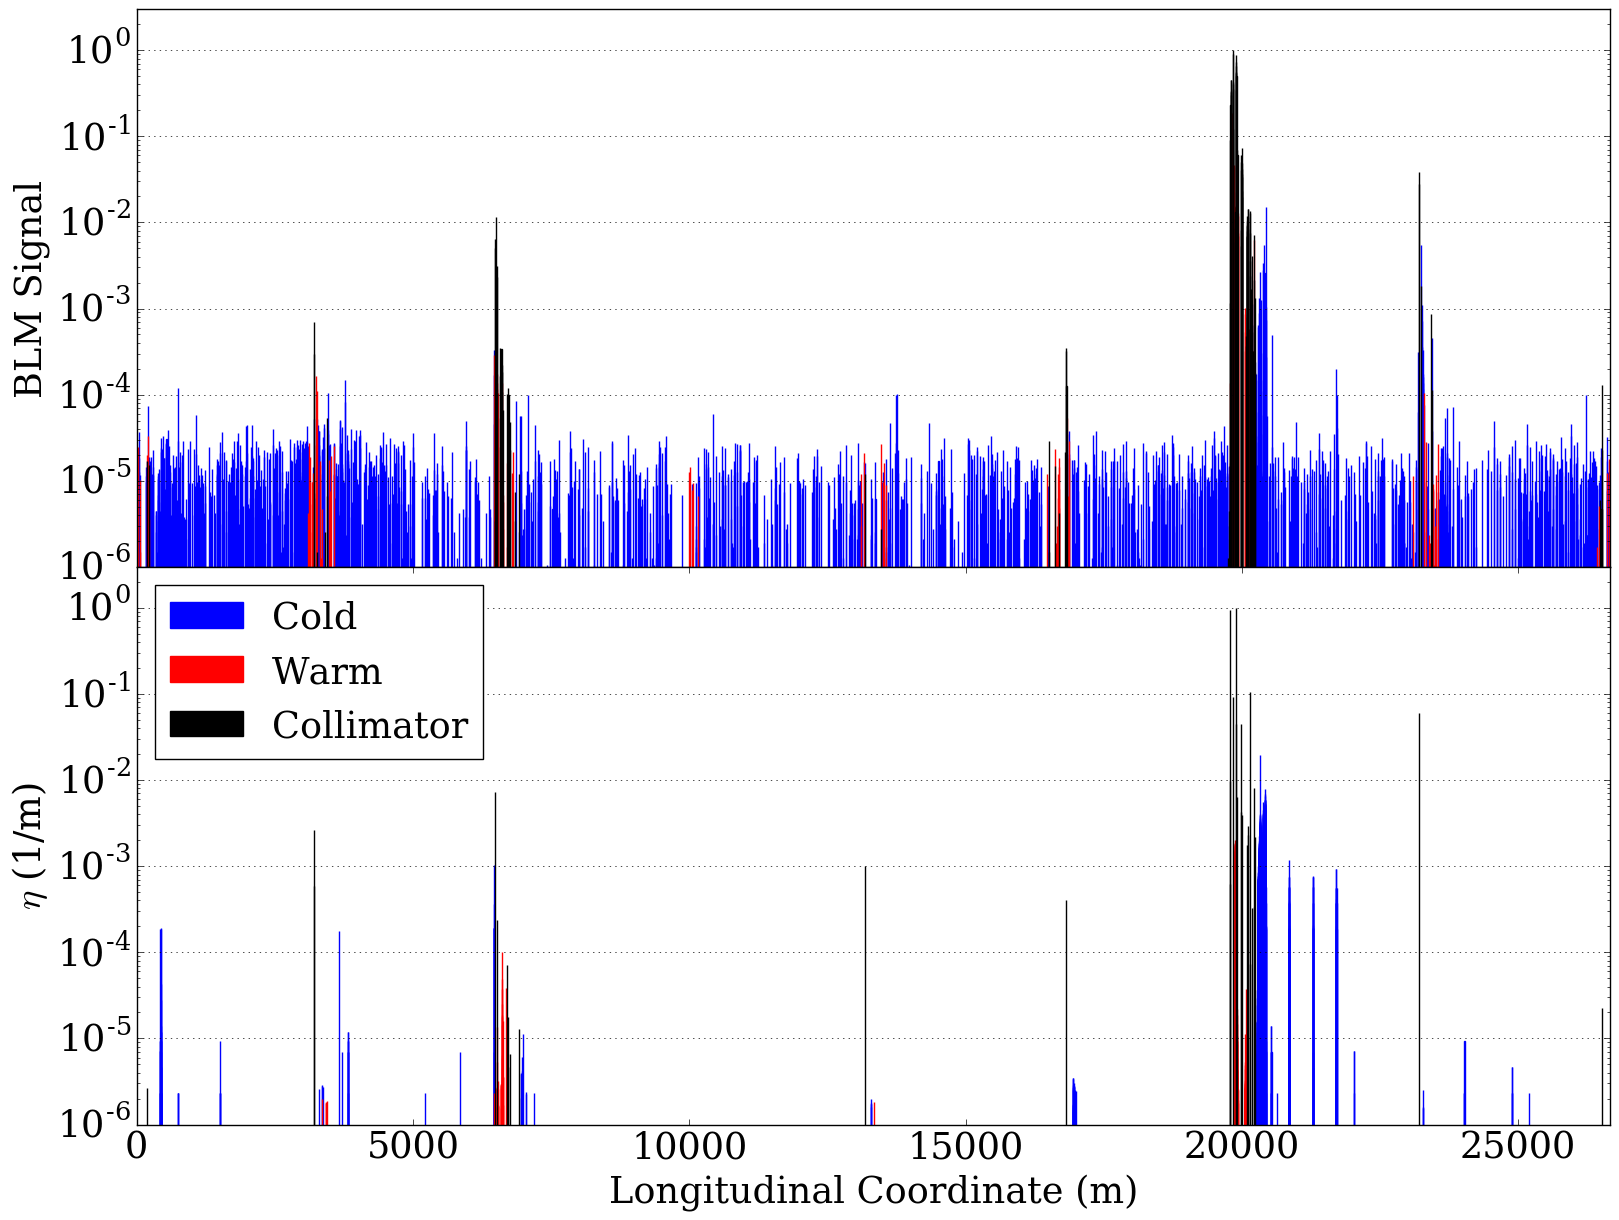

In [16]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

b.lossmap(bg.ax1)


bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_ylabel('BLM Signal')



bg.ax2.bar(losses.cbin,losses.cold/(0.1*losses.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')
bg.ax2.bar(losses.wbin,losses.warm/(0.1*losses.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax2.bar(losses.collimator_array[:,0],losses.collimator_array[:,1]/losses.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax2.set_yscale('log', nonposy='clip')
bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax2.set_ylabel(r'$\eta$ (1/m)')
bg.ax2.xaxis.grid(True)
bg.ax2.yaxis.grid(False)
bg.ax2.grid()
bg.ax2.legend(loc=0)




plt.show()

## Right Collimator Jaw

In [3]:
fort3 = '../../fort.3'
twiss = '../../preprocessing/optics/twiss_b1.tfs'
path  = '/media/phermes/local/hisix_results/2016/B1H/betatron/runs/B1H.NEWOPT.RUN/'
# path  = '../../B1H.NEWOPT.LEFT.RUN/'

#### READ THE LOSSES FROM THE SIMULATION

losses = losses(fort3,twiss)

print '--> FLUKA collimator IDs have been assigned'

### READ THE SUMMARY FILES

losses.getSummary(path)
losses.finalize()

print '--> Summary files read and finalized'



--> Assigned ID from FLUKA input to 41 collimators
--> FLUKA collimator IDs have been assigned
--> Summary files read and finalized


In [4]:
#### READ THE MEASURED LOSSES

qldir    = '/media/phermes/1E10-926A/exp_data/'
filename = qldir+'20161125/BLMLHC_2016-11-25_#1.txt.gz'
time     = '25/11/2016 23:50:19'
b = blm.BLM()
b.read(filename,time)

summary files not found
Loading file
Allocating BLMs
Assigning timestamp
Get Signal
Timestamp found
Averaging over 10 seconds
Substract background
Saving BLM data


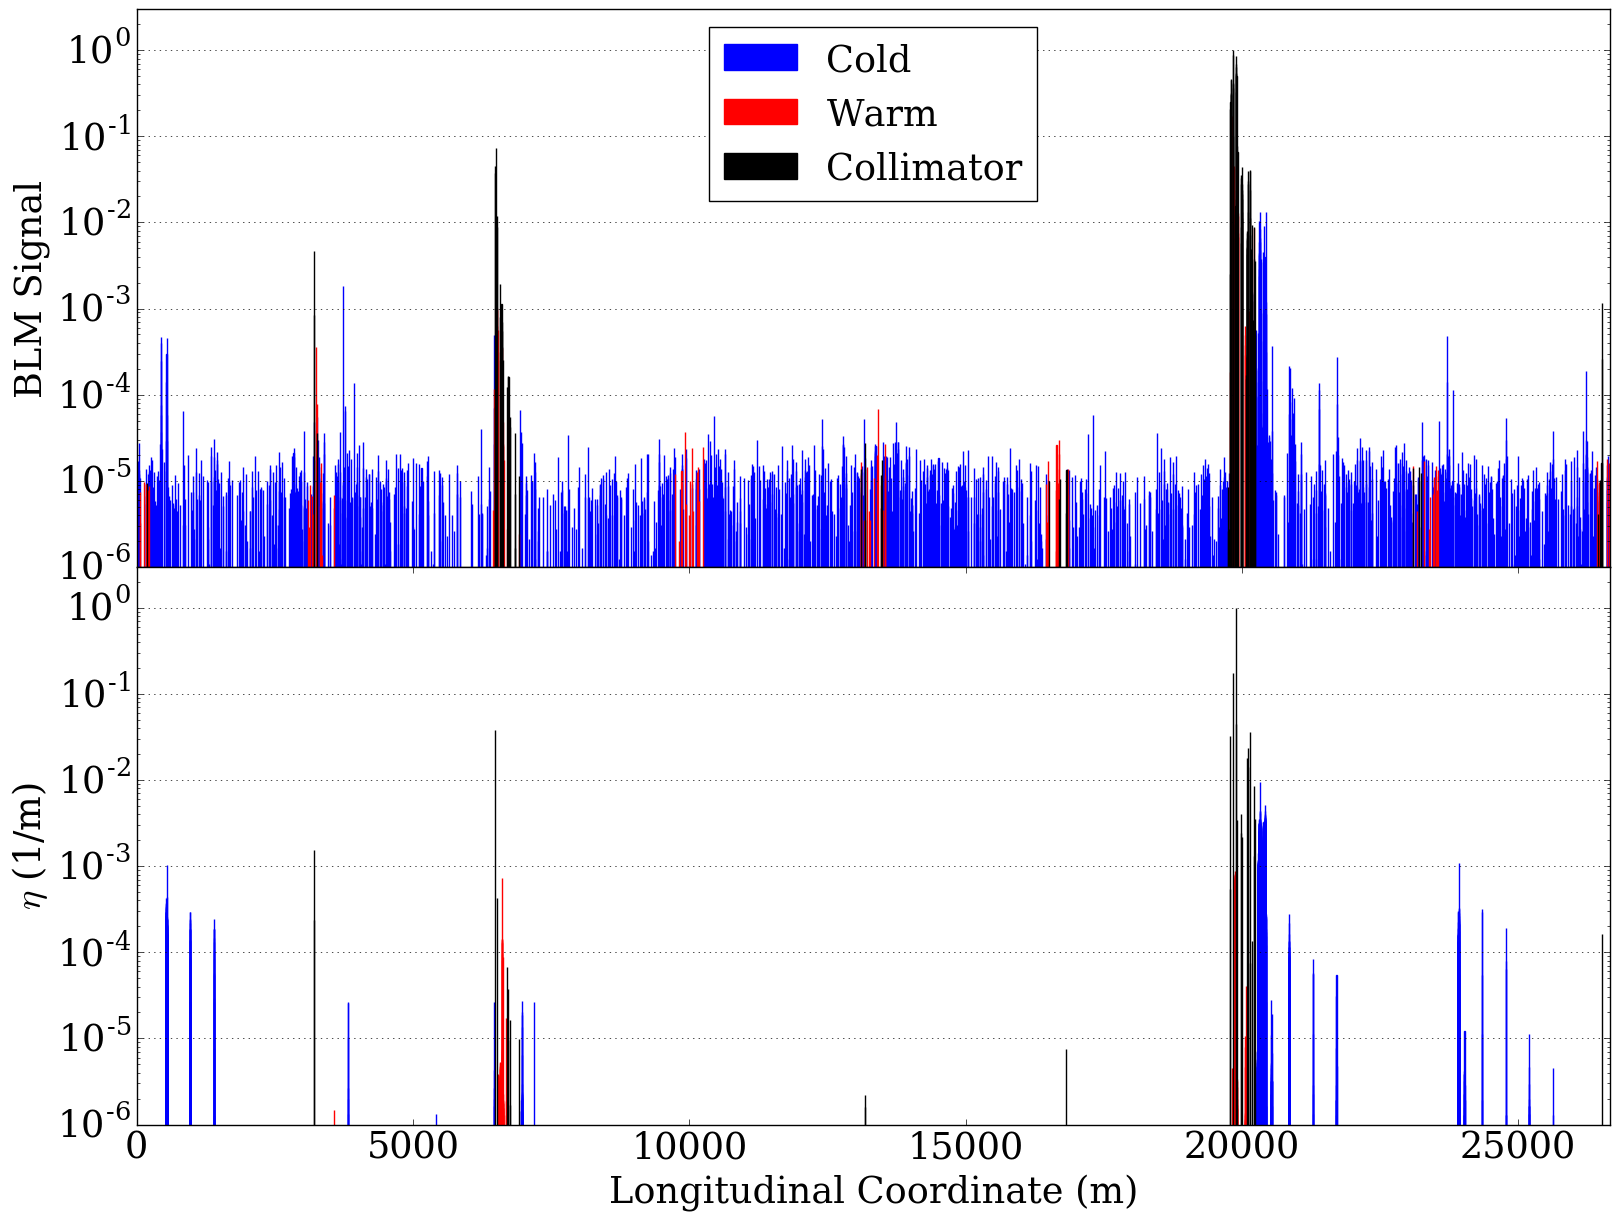

In [9]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

b.lossmap(bg.ax1)


bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_ylabel('BLM Signal')


width = 0.1

bg.ax2.bar(losses.cbin,losses.cold/(0.1*losses.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')
bg.ax2.bar(losses.wbin,losses.warm/(0.1*losses.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax2.bar(losses.collimator_array[:,0],losses.collimator_array[:,1]/losses.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax2.set_yscale('log', nonposy='clip')
bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax2.set_ylabel(r'$\eta$ (1/m)')
bg.ax2.xaxis.grid(True)
bg.ax2.yaxis.grid(False)
bg.ax2.grid()
bg.ax1.legend(loc='upper center')




plt.show()

In [4]:
## compare measured and simulated DS losses

In [6]:
# load the BLM data
qldir    = '/media/phermes/1E10-926A/exp_data/'
filename = qldir+'20161125/BLMLHC_2016-11-25_#1.txt.gz'
time     = '25/11/2016 23:53:43'
bl = blm.BLM()
bl.read(filename,time)

summary files found. loading...


In [7]:
# load the BLM data
qldir    = '/media/phermes/1E10-926A/exp_data/'
filename = qldir+'20161125/BLMLHC_2016-11-25_#1.txt.gz'
time     = '25/11/2016 23:50:19'
br = blm.BLM()
br.read(filename,time)

summary files found. loading...


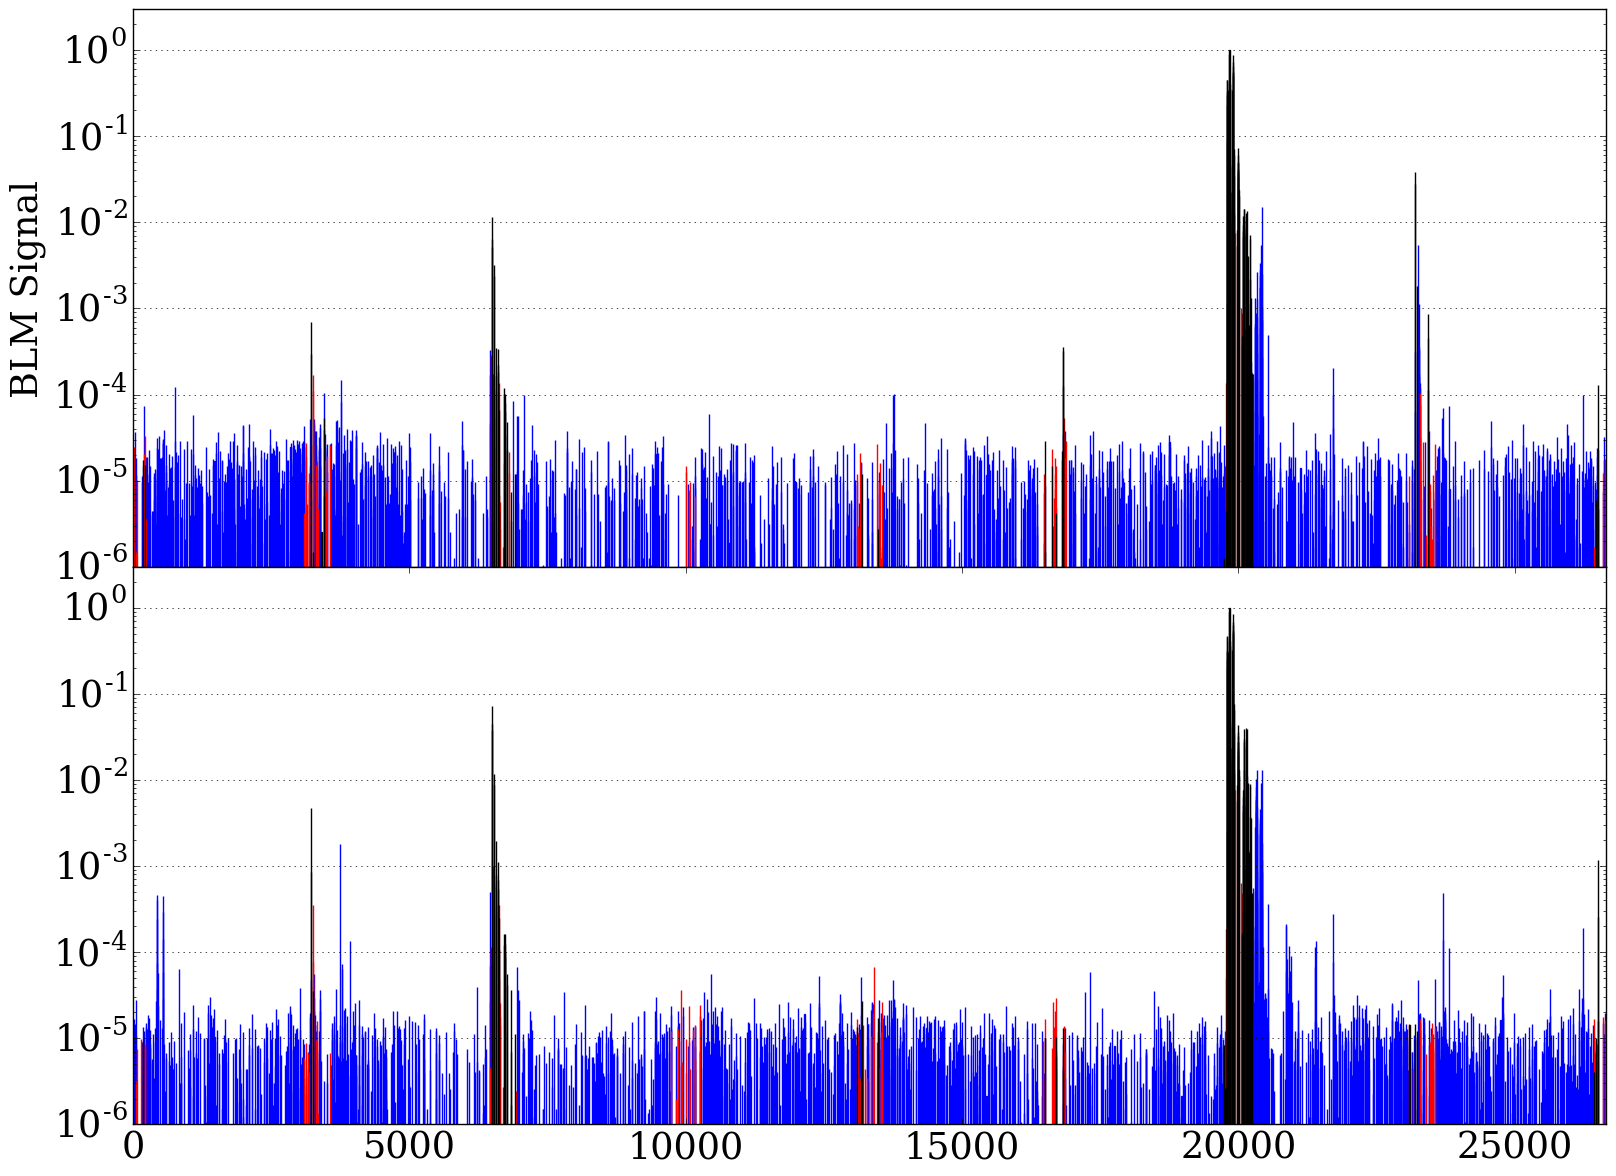

In [8]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

bl.lossmap(bg.ax1)

bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_ylabel('BLM Signal')

br.lossmap(bg.ax2)

bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_ylabel('BLM Signal')


plt.show()

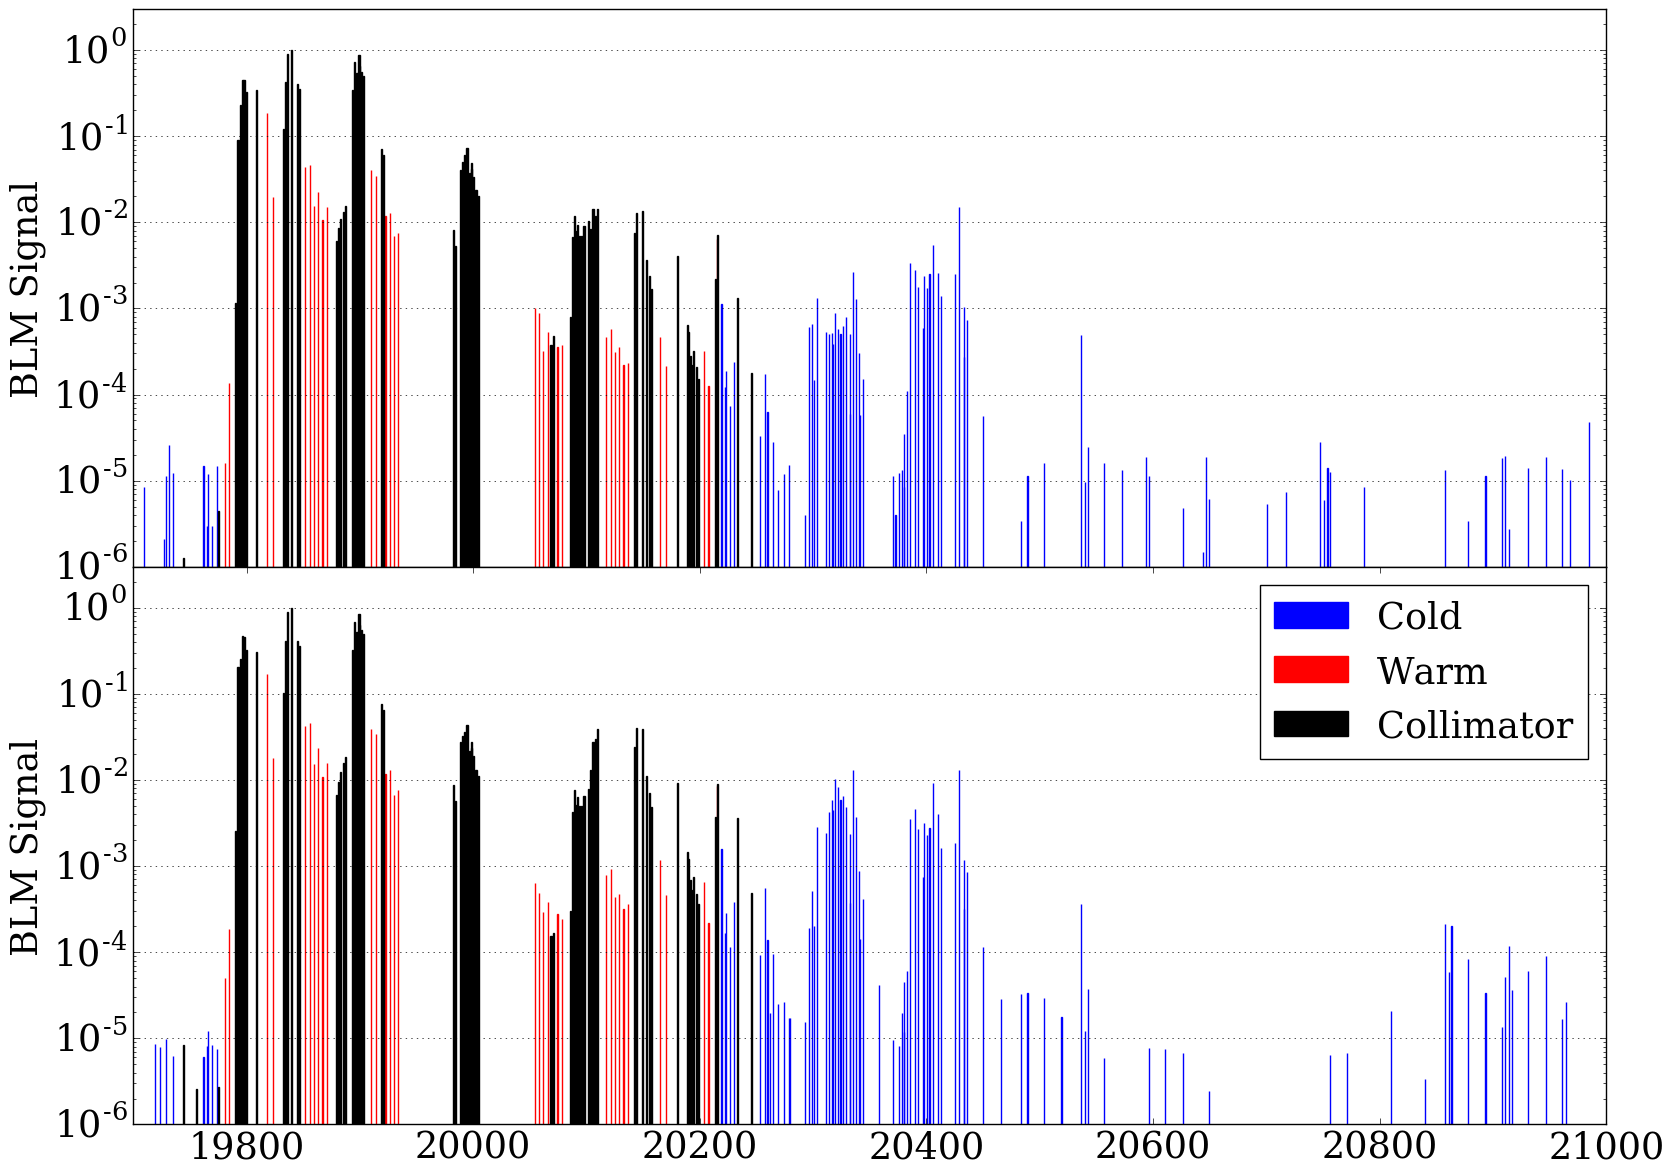

In [11]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
xmin, xmax    = 19700, 21000
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

bl.lossmap(bg.ax1)

bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_ylabel('BLM Signal')

br.lossmap(bg.ax2)

bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_ylabel('BLM Signal')



bg.ax2.legend(loc='upper right')

plt.show()

In [12]:
fort3 = '../../fort.3'
twiss = '../../preprocessing/optics/twiss_b1.tfs'
path  = '../../B1H.NEWOPT.LEFT.RUN/'

#### READ THE LOSSES FROM THE SIMULATION

lossesl = losses(fort3,twiss)

print '--> FLUKA collimator IDs have been assigned'

### READ THE SUMMARY FILES

lossesl.getSummary(path)
lossesl.finalize()

print '--> Summary files read and finalized'



--> Assigned ID from FLUKA input to 41 collimators
--> FLUKA collimator IDs have been assigned
--> Summary files read and finalized


In [13]:
fort3 = '../../fort.3'
twiss = '../../preprocessing/optics/twiss_b1.tfs'
path  = '/media/phermes/local/hisix_results/2016/B1H/betatron/runs/B1H.NEWOPT.RUN/'
# path  = '../../B1H.NEWOPT.LEFT.RUN/'

#### READ THE LOSSES FROM THE SIMULATION

lossesr = losses(fort3,twiss)

print '--> FLUKA collimator IDs have been assigned'

### READ THE SUMMARY FILES

lossesr.getSummary(path)
lossesr.finalize()

print '--> Summary files read and finalized'



--> Assigned ID from FLUKA input to 41 collimators
--> FLUKA collimator IDs have been assigned
--> Summary files read and finalized


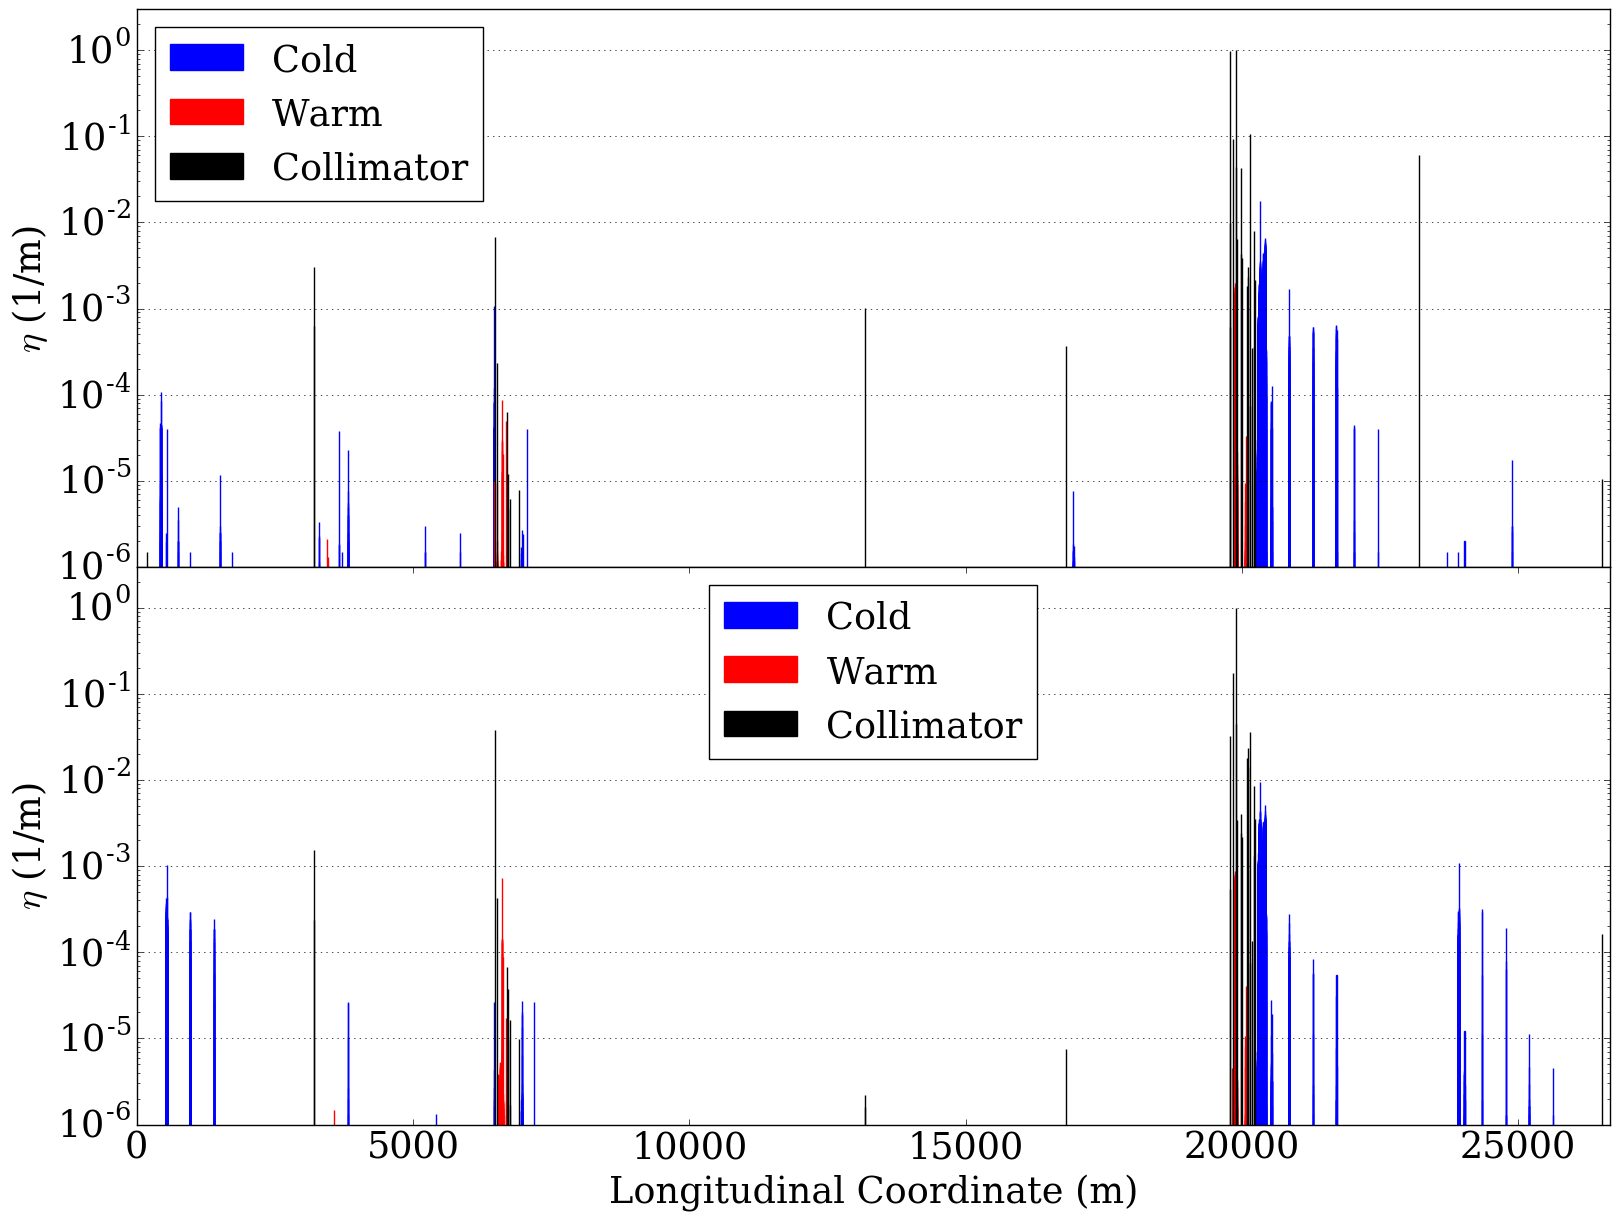

In [17]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

width = 0.1

bg.ax1.bar(lossesl.cbin,lossesl.cold/(0.1*lossesl.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')
bg.ax1.bar(lossesl.wbin,lossesl.warm/(0.1*lossesl.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax1.bar(lossesl.collimator_array[:,0],lossesl.collimator_array[:,1]/lossesl.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax1.set_yscale('log', nonposy='clip')
bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax1.set_ylabel(r'$\eta$ (1/m)')
bg.ax1.xaxis.grid(True)
bg.ax1.yaxis.grid(False)
bg.ax1.grid()
bg.ax1.legend(loc=0)





bg.ax2.bar(lossesr.cbin,lossesr.cold/(0.1*lossesr.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')
bg.ax2.bar(lossesr.wbin,lossesr.warm/(0.1*lossesr.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax2.bar(lossesr.collimator_array[:,0],lossesr.collimator_array[:,1]/lossesr.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax2.set_yscale('log', nonposy='clip')
bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax2.set_ylabel(r'$\eta$ (1/m)')
bg.ax2.xaxis.grid(True)
bg.ax2.yaxis.grid(False)
bg.ax2.grid()
bg.ax2.legend(loc='upper center')




plt.show()

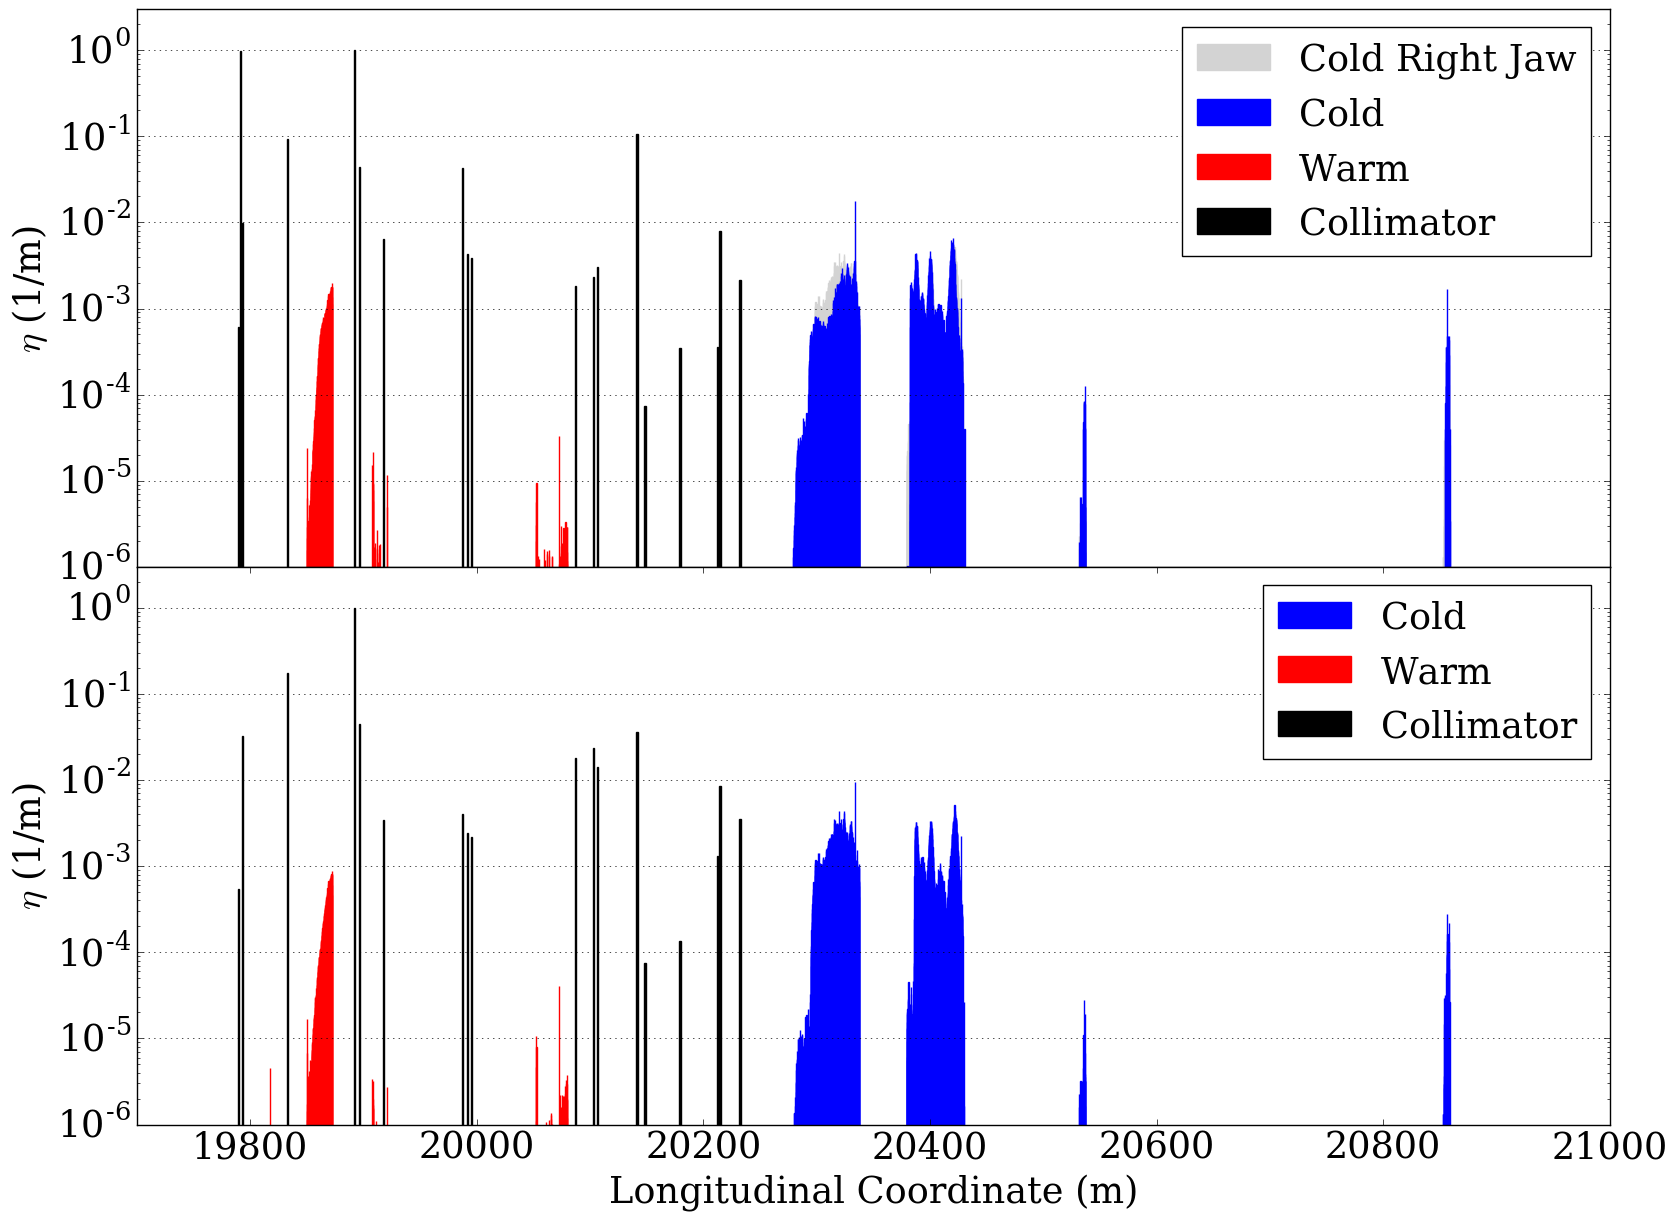

In [20]:
%matplotlib inline

bg = blg.beamlinegraphics(pth)


xmin, xmax    = 0, lt.clhc              # interval in which the blgFigure should be plotted
xmin, xmax    = 19700, 21000
ymin, ymax    = 1e-6,3
# ymin, ymax    = 0, 2000
bg.aspectratio = 1.1                  # aspect ratio
bg.fontscale   = 1.0                  # rescale the font size if necessary; default=1
bg.textwidth   = 1.2                  # adjust the textwidth; default=1

bg.blgFigure(xmin,xmax,subplots=2)               # create blgFigure object
bg.fig.delaxes(bg.blg)

width = 0.1



bg.ax1.bar(lossesr.cbin,lossesr.cold/(0.1*lossesr.normfac),width=width, 
        color='lightgray', edgecolor='lightgray', label='Cold Right Jaw')

bg.ax1.bar(lossesl.cbin,lossesl.cold/(0.1*lossesl.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')

bg.ax1.bar(lossesl.wbin,lossesl.warm/(0.1*lossesl.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax1.bar(lossesl.collimator_array[:,0],lossesl.collimator_array[:,1]/lossesl.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax1.set_yscale('log', nonposy='clip')
bg.ax1.set_xlim(xmin,xmax)
bg.ax1.set_ylim(ymin,ymax)
bg.ax1.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax1.set_ylabel(r'$\eta$ (1/m)')
bg.ax1.xaxis.grid(True)
bg.ax1.yaxis.grid(False)
bg.ax1.grid()
bg.ax1.legend(loc=0)





bg.ax2.bar(lossesr.cbin,lossesr.cold/(0.1*lossesr.normfac),width=width, 
        color='blue', edgecolor='blue', label='Cold')
bg.ax2.bar(lossesr.wbin,lossesr.warm/(0.1*lossesr.normfac),width=width, 
        color='red', edgecolor='red', label='Warm')
bg.ax2.bar(lossesr.collimator_array[:,0],lossesr.collimator_array[:,1]/lossesr.normfac,width=1.0,
           color='black',edgecolor='black',label='Collimator')

## PLOT PROPERTIES
bg.ax2.set_yscale('log', nonposy='clip')
bg.ax2.set_xlim(xmin,xmax)
bg.ax2.set_ylim(ymin,ymax)
bg.ax2.set_xlabel(r'Longitudinal Coordinate (m)')
bg.ax2.set_ylabel(r'$\eta$ (1/m)')
bg.ax2.xaxis.grid(True)
bg.ax2.yaxis.grid(False)
bg.ax2.grid()
bg.ax2.legend(loc=0)




plt.show()